In [1]:
!pip install emoji

     |████████████████████████████████| 175 kB 21.6 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=04899f9986a059d26e9f058798b2b3a407c5ac3f10756a9ab320081f05000812
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [2]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 23.8 MB/s 


In [3]:
import numpy as np
import pandas as pd
import nltk as nltk
from nltk.corpus import stopwords
import re
import string
import emoji
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  cross_val_score

In [4]:
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
tweets = pd.read_csv("cyberbullying_tweets.csv")

In [6]:
tweets.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [7]:
tweets['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
#remove stopwords
stop_words = set(stopwords.words('english'))
stop_words.remove("not")
stop_words.add("rt") #for twitter retweet
stop_words.remove("against")
# stop_words

In [10]:
print(stop_words)

{'has', 'hers', 'such', 'me', 'had', 'then', 'having', 'both', 'are', 'have', 'who', 'just', 'rt', "don't", 'no', "you've", 'they', 'in', 'her', 'of', 'between', 'same', 've', 'than', 'wasn', 't', 'aren', 'hasn', 'be', 'down', 'it', 'won', 'i', 'because', 'now', 'that', 'am', 'but', 'themselves', 'with', 're', 'hadn', 'himself', 'being', "she's", 'or', 'to', 'after', "it's", 'from', 'you', "that'll", 'couldn', 'is', 'isn', 'up', 'your', 'by', "haven't", 'under', 'yourself', 'he', 'any', 'how', 'needn', 'here', 'these', 'the', 'those', "you'd", 'where', 'doing', 'only', 'above', 'herself', 'll', 'did', 'which', 'a', "aren't", 'yours', 'more', 'ma', "won't", 'if', 'she', 'y', 'again', 'on', 'our', 'didn', 'some', 'over', "should've", 'before', 'myself', 'should', 'as', 'an', 'd', "wasn't", 'm', 'until', 'were', 'about', 'been', 'can', 'for', 'haven', 'other', 'them', 'most', 'further', 'will', 'nor', 'weren', "hasn't", 'very', "doesn't", 'into', 'during', "weren't", 'ourselves', 'itself'

In [11]:
twitter_string = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [12]:
tweets["processed_tweet"] = tweets["tweet_text"].str.lower()

In [13]:
#remove tags to people and 
# retweet links of the people 
# and also remove stopwords
# and convert emoji to words

tweets["processed_tweet"] = tweets["tweet_text"] \
.apply(lambda x : [value for value in x.split(" ") if value.strip() not in stop_words]) \
.apply(lambda x : [value for value in x if not value.startswith('@')]) \
.apply(lambda x : ' '.join(x).strip()) \
.apply(lambda x : re.sub(twitter_string,' ', x)) \
.apply(lambda x : x.translate(str.maketrans('', '', string.punctuation)).strip()) \
.apply(lambda x : emoji.demojize(x)) 

tweets

,tweet_text,cyberbullying_type,processed_tweet
0,"In other words #katandandre, your food was cra...",not_cyberbullying,In words katandandre food crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,Why aussietv white MKR theblock ImACelebrityAU...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore Or red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh P thanks heads up not concerned another an...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,This ISIS account pretending Kurdish account L...
...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,Black ppl expected anything depended anything ...
47688,Turner did not withhold his disappointment. Tu...,ethnicity,Turner not withhold disappointment Turner call...
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,I swear God This dumb nigger bitch I got bleac...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,Yea fuck RT IF YOURE A NIGGER FUCKING UNFOLLOW...


In [14]:
#without stopwords

tweets["processed_tweet_wostopwords"] = tweets["tweet_text"] \
.apply(lambda x : [value.strip() for value in x.split(" ")]) \
.apply(lambda x : [value for value in x if not value.startswith('@')]) \
.apply(lambda x : ' '.join(x).strip()) \
.apply(lambda x : re.sub(twitter_string,' ', x)) \
.apply(lambda x : x.translate(str.maketrans('', '', string.punctuation)).strip()) \
.apply(lambda x : emoji.demojize(x)) 

tweets

,tweet_text,cyberbullying_type,processed_tweet,processed_tweet_wostopwords
0,"In other words #katandandre, your food was cra...",not_cyberbullying,In words katandandre food crapilicious mkr,In other words katandandre your food was crapi...
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,Why aussietv white MKR theblock ImACelebrityAU...,Why is aussietv so white MKR theblock ImACeleb...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore Or red velvet cupcakes,a classy whore Or more red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh P thanks heads up not concerned another an...,meh P thanks for the heads up but not too conc...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,This ISIS account pretending Kurdish account L...,This is an ISIS account pretending to be a Kur...
...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,Black ppl expected anything depended anything ...,Black ppl aren t expected to do anything depen...
47688,Turner did not withhold his disappointment. Tu...,ethnicity,Turner not withhold disappointment Turner call...,Turner did not withhold his disappointment Tur...
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,I swear God This dumb nigger bitch I got bleac...,I swear to God This dumb nigger bitch I have g...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,Yea fuck RT IF YOURE A NIGGER FUCKING UNFOLLOW...,Yea fuck you RT IF YOURE A NIGGER FUCKING UNFO...


In [15]:
#doing lemmatization
lemmatizer = WordNetLemmatizer()
# word_tokenize("heojf doof")

In [16]:
tweets["processed_tweet_lemm"] = tweets["processed_tweet"]\
                            .apply(lambda x : ' '.join([lemmatizer.lemmatize(value) for value in word_tokenize(x)]))

In [17]:
tweets["processed_tweet_lemm_wostopwords"] = tweets["processed_tweet_wostopwords"]\
                            .apply(lambda x : ' '.join([lemmatizer.lemmatize(value) for value in word_tokenize(x)]))

In [18]:
tweets.head()

,tweet_text,cyberbullying_type,processed_tweet,processed_tweet_wostopwords,processed_tweet_lemm,processed_tweet_lemm_wostopwords
0,"In other words #katandandre, your food was cra...",not_cyberbullying,In words katandandre food crapilicious mkr,In other words katandandre your food was crapi...,In word katandandre food crapilicious mkr,In other word katandandre your food wa crapili...
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,Why aussietv white MKR theblock ImACelebrityAU...,Why is aussietv so white MKR theblock ImACeleb...,Why aussietv white MKR theblock ImACelebrityAU...,Why is aussietv so white MKR theblock ImACeleb...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore Or red velvet cupcakes,a classy whore Or more red velvet cupcakes,classy whore Or red velvet cupcake,a classy whore Or more red velvet cupcake
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh P thanks heads up not concerned another an...,meh P thanks for the heads up but not too conc...,meh P thanks head up not concerned another ang...,meh P thanks for the head up but not too conce...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,This ISIS account pretending Kurdish account L...,This is an ISIS account pretending to be a Kur...,This ISIS account pretending Kurdish account L...,This is an ISIS account pretending to be a Kur...


In [19]:
tweets.to_csv("Intermediate_file.csv")

# Exploratory Data Analysis

In [20]:
!pip install WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [21]:
tweets.groupby("cyberbullying_type").size()

cyberbullying_type
age                    7992
ethnicity              7961
gender                 7973
not_cyberbullying      7945
other_cyberbullying    7823
religion               7998
dtype: int64

In [22]:
#To display count of each type of cyberbullying record that we have and individual counts

import plotly.express as px
fig = px.bar(tweets.cyberbullying_type.value_counts(),text=tweets.cyberbullying_type.value_counts(), color_discrete_sequence=px.colors.qualitative.D3, custom_data=[tweets.cyberbullying_type.value_counts()])
fig.update_traces(hovertemplate='<br><b>Total: </b>%{customdata[0]}')
fig.update_layout(title='Cyberbullying types',
                 template='seaborn',
                 hovermode='x unified',
                 xaxis=dict(title='Cyberbullying Type'),
                 yaxis=dict(title='Tweet Count'),
                 showlegend=True)


fig.show()

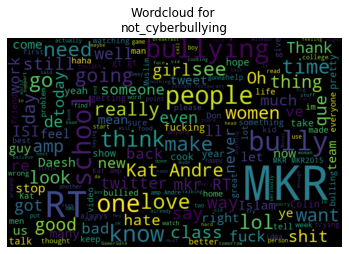

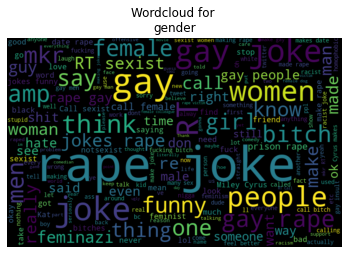

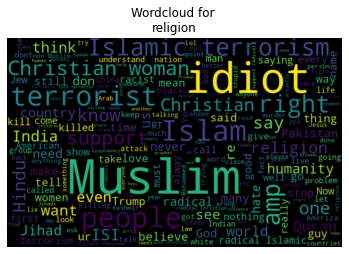

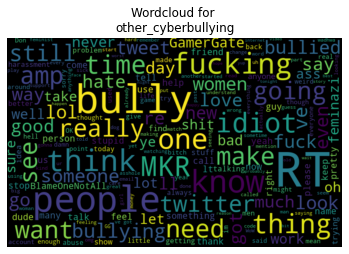

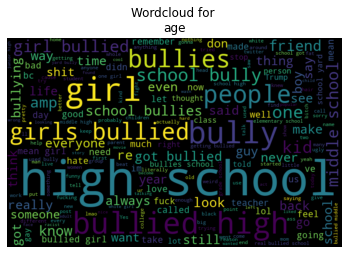

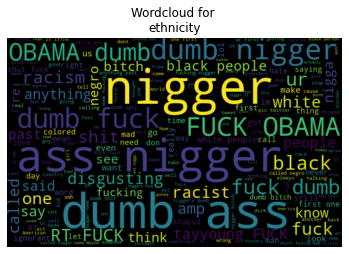

In [23]:
for cyber_type in tweets.cyberbullying_type.unique():
  allwords = ' '.join([twts for twts in tweets.processed_tweet[tweets.cyberbullying_type==cyber_type]])
  wordCloud = WordCloud(width=800,height=500,random_state=21,max_font_size=115).generate(allwords)
 
  plt.imshow(wordCloud, interpolation="bilinear")
  plt.axis('off')
  plt.title("Wordcloud for \n"+ cyber_type)
  plt.show()


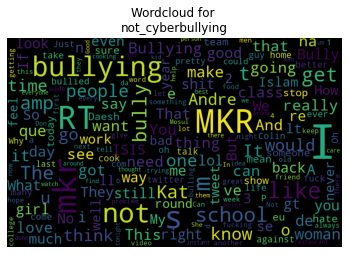

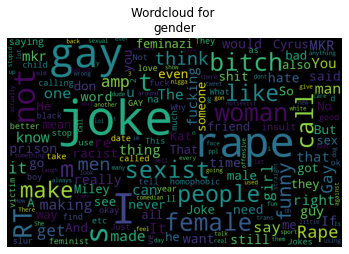

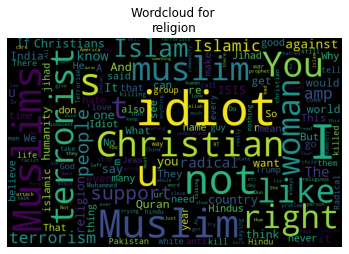

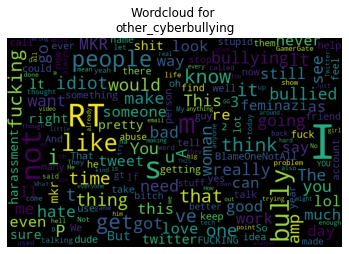

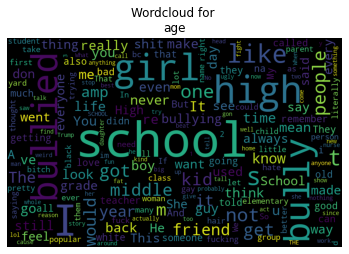

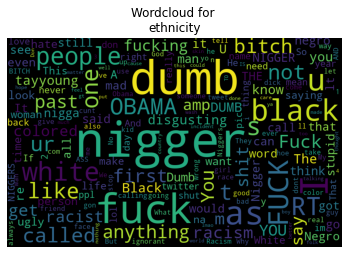

In [24]:
#this is done on lemmatized words -> just to know how many distinct words can we get
# We see only very little difference, but the counts specify alot
from collections import Counter
for cyber_type in tweets.cyberbullying_type.unique():
    
    allwords = [twts.split(" ") for twts in tweets.processed_tweet_lemm[tweets.cyberbullying_type==cyber_type]]
    allwords = list(itertools.chain.from_iterable(allwords))
    allwords = Counter(allwords)
    wordCloud = WordCloud(width=800,height=500,random_state=30,max_font_size=115) \
                            .generate_from_frequencies(allwords)
    
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.title("Wordcloud for \n"+ cyber_type)
    plt.show()

In [25]:
tweets

,tweet_text,cyberbullying_type,processed_tweet,processed_tweet_wostopwords,processed_tweet_lemm,processed_tweet_lemm_wostopwords
0,"In other words #katandandre, your food was cra...",not_cyberbullying,In words katandandre food crapilicious mkr,In other words katandandre your food was crapi...,In word katandandre food crapilicious mkr,In other word katandandre your food wa crapili...
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,Why aussietv white MKR theblock ImACelebrityAU...,Why is aussietv so white MKR theblock ImACeleb...,Why aussietv white MKR theblock ImACelebrityAU...,Why is aussietv so white MKR theblock ImACeleb...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore Or red velvet cupcakes,a classy whore Or more red velvet cupcakes,classy whore Or red velvet cupcake,a classy whore Or more red velvet cupcake
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh P thanks heads up not concerned another an...,meh P thanks for the heads up but not too conc...,meh P thanks head up not concerned another ang...,meh P thanks for the head up but not too conce...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,This ISIS account pretending Kurdish account L...,This is an ISIS account pretending to be a Kur...,This ISIS account pretending Kurdish account L...,This is an ISIS account pretending to be a Kur...
...,...,...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,Black ppl expected anything depended anything ...,Black ppl aren t expected to do anything depen...,Black ppl expected anything depended anything ...,Black ppl aren t expected to do anything depen...
47688,Turner did not withhold his disappointment. Tu...,ethnicity,Turner not withhold disappointment Turner call...,Turner did not withhold his disappointment Tur...,Turner not withhold disappointment Turner call...,Turner did not withhold his disappointment Tur...
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,I swear God This dumb nigger bitch I got bleac...,I swear to God This dumb nigger bitch I have g...,I swear God This dumb nigger bitch I got bleac...,I swear to God This dumb nigger bitch I have g...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,Yea fuck RT IF YOURE A NIGGER FUCKING UNFOLLOW...,Yea fuck you RT IF YOURE A NIGGER FUCKING UNFO...,Yea fuck RT IF YOURE A NIGGER FUCKING UNFOLLOW...,Yea fuck you RT IF YOURE A NIGGER FUCKING UNFO...


# Sentiment Analysis

In [26]:
sid_obj = SentimentIntensityAnalyzer()

In [27]:
tweets['sentiments'] = tweets['processed_tweet'].apply(lambda x: sid_obj.polarity_scores(str(x)))

In [28]:
tweet_sentiment = tweets['sentiments'].apply(pd.Series)

In [29]:
tweets = tweets.merge(tweet_sentiment, left_index=True, right_index=True)

In [30]:
tweets.head()

,tweet_text,cyberbullying_type,processed_tweet,processed_tweet_wostopwords,processed_tweet_lemm,processed_tweet_lemm_wostopwords,sentiments,neg,neu,pos,compound
0,"In other words #katandandre, your food was cra...",not_cyberbullying,In words katandandre food crapilicious mkr,In other words katandandre your food was crapi...,In word katandandre food crapilicious mkr,In other word katandandre your food wa crapili...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,Why aussietv white MKR theblock ImACelebrityAU...,Why is aussietv so white MKR theblock ImACeleb...,Why aussietv white MKR theblock ImACelebrityAU...,Why is aussietv so white MKR theblock ImACeleb...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore Or red velvet cupcakes,a classy whore Or more red velvet cupcakes,classy whore Or red velvet cupcake,a classy whore Or more red velvet cupcake,"{'neg': 0.384, 'neu': 0.357, 'pos': 0.259, 'co...",0.384,0.357,0.259,-0.3400
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh P thanks heads up not concerned another an...,meh P thanks for the heads up but not too conc...,meh P thanks head up not concerned another ang...,meh P thanks for the head up but not too conce...,"{'neg': 0.087, 'neu': 0.537, 'pos': 0.376, 'co...",0.087,0.537,0.376,0.6488
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,This ISIS account pretending Kurdish account L...,This is an ISIS account pretending to be a Kur...,This ISIS account pretending Kurdish account L...,This is an ISIS account pretending to be a Kur...,"{'neg': 0.22, 'neu': 0.472, 'pos': 0.307, 'com...",0.220,0.472,0.307,0.0258


In [31]:
tweets.rename(columns = {"neu":"Neutral", "neg":"Negative", "pos":"Positive", "compound":"Total_Sentiment_Score"}, inplace=True)

In [32]:
tweets.head()

,tweet_text,cyberbullying_type,processed_tweet,processed_tweet_wostopwords,processed_tweet_lemm,processed_tweet_lemm_wostopwords,sentiments,Negative,Neutral,Positive,Total_Sentiment_Score
0,"In other words #katandandre, your food was cra...",not_cyberbullying,In words katandandre food crapilicious mkr,In other words katandandre your food was crapi...,In word katandandre food crapilicious mkr,In other word katandandre your food wa crapili...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,Why aussietv white MKR theblock ImACelebrityAU...,Why is aussietv so white MKR theblock ImACeleb...,Why aussietv white MKR theblock ImACelebrityAU...,Why is aussietv so white MKR theblock ImACeleb...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore Or red velvet cupcakes,a classy whore Or more red velvet cupcakes,classy whore Or red velvet cupcake,a classy whore Or more red velvet cupcake,"{'neg': 0.384, 'neu': 0.357, 'pos': 0.259, 'co...",0.384,0.357,0.259,-0.3400
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh P thanks heads up not concerned another an...,meh P thanks for the heads up but not too conc...,meh P thanks head up not concerned another ang...,meh P thanks for the head up but not too conce...,"{'neg': 0.087, 'neu': 0.537, 'pos': 0.376, 'co...",0.087,0.537,0.376,0.6488
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,This ISIS account pretending Kurdish account L...,This is an ISIS account pretending to be a Kur...,This ISIS account pretending Kurdish account L...,This is an ISIS account pretending to be a Kur...,"{'neg': 0.22, 'neu': 0.472, 'pos': 0.307, 'com...",0.220,0.472,0.307,0.0258


# TFIDF Matrix

In [86]:
#Importing TFIDFVectorizer
#min_df value determines lower base limit of tfidf value
#Max_features can be regulated to limit maximum columns of tfidf
from sklearn.feature_extraction.text import TfidfVectorizer  
v = TfidfVectorizer(max_features=1000,min_df=0.002,max_df=1.0,analyzer='word')

In [87]:
#Storing tfidf values using processed tweets column as train set
x = v.fit_transform(tweets['processed_tweet_lemm_wostopwords'])
tokens=v.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [88]:
#Creating TFIDF table dataframe using sentences vs processed tweets 

df_tfidfvect = pd.DataFrame(data = x.toarray(),index =tweets['tweet_text'],columns=tokens)

In [89]:
# print(df_tfidfvect)
df_tfidfvect.to_csv("TFIDF_Matrix.csv")

In [90]:
df_tfidfvect.head()

,10,100,11,12,15,20,able,abortion,about,absolutely,...,yeah,year,yes,yet,yo,you,young,your,yourself,yr
tweet_text,,,,,,,,,,,,,,,,,,,,,
"In other words #katandandre, your food was crapilicious! #mkr",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.303887,0.0,0.0
Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.196578,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


# Feature Engineering

In [91]:
columns_to_pick = ["tweet_text", "cyberbullying_type", "processed_tweet", "processed_tweet_lemm_wostopwords","Negative", "Neutral",\
                   "Positive", "Total_Sentiment_Score"]

df_tfidfvect.reset_index()
df_feature= pd.merge(tweets[columns_to_pick],df_tfidfvect, how="left", on=["tweet_text", "tweet_text"])
df_feature.head()

,tweet_text,cyberbullying_type,processed_tweet,processed_tweet_lemm_wostopwords,Negative,Neutral,Positive,Total_Sentiment_Score,10,100,...,yeah,year,yes,yet,yo,you,young,your,yourself,yr
0,"In other words #katandandre, your food was cra...",not_cyberbullying,In words katandandre food crapilicious mkr,In other word katandandre your food wa crapili...,0.000,1.000,0.000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.303887,0.0,0.0
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,Why aussietv white MKR theblock ImACelebrityAU...,Why is aussietv so white MKR theblock ImACeleb...,0.000,1.000,0.000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore Or red velvet cupcakes,a classy whore Or more red velvet cupcake,0.384,0.357,0.259,-0.3400,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh P thanks heads up not concerned another an...,meh P thanks for the head up but not too conce...,0.087,0.537,0.376,0.6488,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh P thanks heads up not concerned another an...,meh P thanks for the head up but not too conce...,0.087,0.537,0.376,0.6488,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [93]:
label= {'not_cyberbullying': 0,
             'gender': 1,
             'religion': 2,
             'other_cyberbullying': 3,
             'age': 4,
             'ethnicity': 5}
df_feature['cyberbullying_type'] = df_feature.cyberbullying_type.replace(label)
df_feature.head()

,tweet_text,cyberbullying_type,processed_tweet,processed_tweet_lemm_wostopwords,Negative,Neutral,Positive,Total_Sentiment_Score,10,100,...,yeah,year,yes,yet,yo,you,young,your,yourself,yr
0,"In other words #katandandre, your food was cra...",0,In words katandandre food crapilicious mkr,In other word katandandre your food wa crapili...,0.000,1.000,0.000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.303887,0.0,0.0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,Why aussietv white MKR theblock ImACelebrityAU...,Why is aussietv so white MKR theblock ImACeleb...,0.000,1.000,0.000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,@XochitlSuckkks a classy whore? Or more red ve...,0,classy whore Or red velvet cupcakes,a classy whore Or more red velvet cupcake,0.384,0.357,0.259,-0.3400,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,meh P thanks heads up not concerned another an...,meh P thanks for the head up but not too conce...,0.087,0.537,0.376,0.6488,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,"@Jason_Gio meh. :P thanks for the heads up, b...",0,meh P thanks heads up not concerned another an...,meh P thanks for the head up but not too conce...,0.087,0.537,0.376,0.6488,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


# Model Development

In [94]:

y=df_feature.iloc[:,1:2]
y.head()

,cyberbullying_type
0,0
1,0
2,0
3,0
4,0


In [95]:
#Learning what exactly goes into the training DataFrame ->>

X=df_feature.iloc[:,4:1006]
X.head()

,Negative,Neutral,Positive,Total_Sentiment_Score,10,100,11,12,15,20,...,yeah,year,yes,yet,yo,you,young,your,yourself,yr
0,0.000,1.000,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.303887,0.0,0.0
1,0.000,1.000,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.384,0.357,0.259,-0.3400,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.087,0.537,0.376,0.6488,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.087,0.537,0.376,0.6488,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=555)

### Random Forest Classifier

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=0,criterion='gini')
rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(random_state=0)

In [44]:
y_pred = rf.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))

Accuracy : 0.782211


In [45]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [63]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
   # 'max_features': [2, 3],
   # 'min_samples_leaf': [3, 4, 5],
  #  'min_samples_split': [8, 10, 12],
    'n_estimators': [100]
}

rf_hp = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5)

In [64]:
rf_hp.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/s

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'n_estimators': [100]})

In [1]:
y_pred = rf_hp.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))

Accuracy : 0.829


In [66]:
rf_hp.best_params_

{'bootstrap': True, 'max_depth': 90, 'n_estimators': 100}

### Decision Tree Classifier

In [98]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,splitter='best', criterion='gini')
clf = clf.fit(X_train,y_train)

In [99]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))

Accuracy : 0.753282


In [100]:
clf.get_depth()

434

In [101]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
# tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8]}
clf_hp = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
clf_hp.fit(X_train,y_train)

KeyboardInterrupt: ignored

In [50]:
y_pred = clf_hp.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))

Accuracy : 0.788023


In [51]:
clf_hp.best_params_

{'criterion': 'gini', 'max_depth': 40}

### Bagging Classifier

In [102]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier()
bc = bc.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [103]:
y_pred = bc.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))

Accuracy : 0.776073


### Gradient Boosting Classifier

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc = gbc.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [105]:
y_pred = gbc.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))

Accuracy : 0.805525


### Histogram based gradient boosting classifier

In [106]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
hgbc=GradientBoostingClassifier()
hgbc = hgbc.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [107]:
y_pred = hgbc.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))

Accuracy : 0.804480


### XGBoost

In [ ]:
import xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb=xgb.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [53]:
y_pred = xgb.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))

Accuracy : 0.799647


In [59]:
model = XGBClassifier()
param_grid = {
    #'n_estimators': [100],
    #'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25]
    #'reg_alpha': [1.1, 1.2, 1.3],
    #'reg_lambda': [1.1, 1.2, 1.3],
    #'subsample': [0.7, 0.8, 0.9]
}

xgb_hp=GridSearchCV(estimator=model,param_grid=param_grid, cv=2, n_jobs=-1,verbose=2)
xgb_hp.fit(X_train,y_train)



Fitting 2 folds for each of 3 candidates, totalling 6 fits


KeyboardInterrupt: ignored

In [ ]:
y_pred = xgb_hp.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))

### LightGBM

In [ ]:
import lightgbm
from lightgbm import LGBMClassifier
Lgbm=XGBClassifier()
Lgbm=Lgbm.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
y_pred = Lgbm.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))

Accuracy : 0.790374


In [ ]:
model = LGBMClassifier()
param_grid = {
    'n_estimators': [100],
    #'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    #'num_leaves': [50, 100, 200],
    #'reg_alpha': [1.1, 1.2, 1.3],
    #'reg_lambda': [1.1, 1.2, 1.3],
    #'min_split_gain': [0.3, 0.4],
    #'subsample': [0.7, 0.8, 0.9],
    #'subsample_freq': [20]
}

lgb_hp=GridSearchCV(estimator=model,param_grid=param_grid, cv=5, n_jobs=-1,verbose=2)
lgb_hp.fit(X_train,y_train)

In [ ]:
y_pred = lgb_hp.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))

## CatBoost

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 57 kB/s 


In [ ]:
import catboost
from catboost import CatBoostClassifier
cb=CatBoostClassifier(verbose=0, n_estimators=100)
cb=cb.fit(X_train,y_train)

In [ ]:
y_pred = cb.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))

Accuracy : 0.786456


### Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100)
abc=abc.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
y_pred =abc.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))

Accuracy : 0.765167


## Model to predict if the tweet is bullying or not

In [ ]:
df_feature_binary= pd.merge(tweets[columns_to_pick],df_tfidfvect, how="left", on=["tweet_text", "tweet_text"])

label= {'not_cyberbullying': 0,
             'gender': 1,
             'religion': 1,
             'other_cyberbullying': 1,
             'age': 1,
             'ethnicity': 1}
df_feature_binary['cyberbullying_type'] = df_feature_binary.cyberbullying_type.replace(label)
df_feature_binary.head()

In [ ]:
y=df_feature_binary.iloc[:,1:2]
y["cyberbullying_type"].unique()

In [ ]:
X=df_feature.iloc[:,3:405]
X.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=555)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,splitter='best', criterion='gini')
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))

### Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=0,criterion='gini')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))

### Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier()
bc = bc.fit(X_train,y_train)

In [ ]:
y_pred = bc.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))

### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc = gbc.fit(X_train,y_train)

In [ ]:
y_pred = gbc.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))

### Histogram based gradient boosting classifier

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
hgbc=GradientBoostingClassifier()
hgbc = hgbc.fit(X_train,y_train)

In [ ]:
y_pred = hgbc.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))

### XGBoost

In [ ]:
import xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb=xgb.fit(X_train,y_train)

In [ ]:
y_pred = xgb.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))

### LightGBM

In [ ]:
import lightgbm
from lightgbm import LGBMClassifier
Lgbm=XGBClassifier()
Lgbm=Lgbm.fit(X_train,y_train)

In [ ]:
y_pred = Lgbm.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))

### CatBoost

In [ ]:
!pip install catboost

In [ ]:
import catboost
from catboost import CatBoostClassifier
cb=CatBoostClassifier(verbose=0, n_estimators=100)
cb=cb.fit(X_train,y_train)

In [ ]:
y_pred = cb.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))

### Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100)
abc=abc.fit(X_train,y_train)

In [ ]:
y_pred =abc.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))